In [181]:
import numpy as np

import pickle

import matplotlib.pyplot as plt
%matplotlib inline  

# Eigvalues of Q

In [262]:
Q = pickle.load(open('./raw_data/Q','rb')) 

(array([13.,  3.,  1.,  2.,  1.,  2.,  0.,  2.,  0.,  0.,  1.,  0.,  1.,
         0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([6.40282786e-05, 9.04631146e-01, 1.80919826e+00, 2.71376538e+00,
        3.61833250e+00, 4.52289962e+00, 5.42746674e+00, 6.33203386e+00,
        7.23660097e+00, 8.14116809e+00, 9.04573521e+00, 9.95030233e+00,
        1.08548694e+01, 1.17594366e+01, 1.26640037e+01, 1.35685708e+01,
        1.44731379e+01, 1.53777050e+01, 1.62822722e+01, 1.71868393e+01,
        1.80914064e+01, 1.89959735e+01, 1.99005406e+01, 2.08051077e+01,
        2.17096749e+01, 2.26142420e+01, 2.35188091e+01, 2.44233762e+01,
        2.53279433e+01, 2.62325105e+01, 2.71370776e+01]),
 <BarContainer object of 30 artists>)

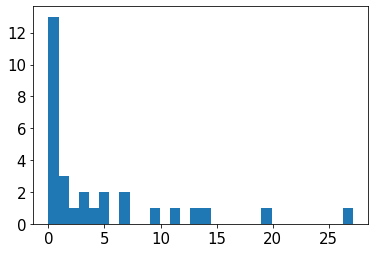

In [266]:
plt.hist( np.linalg.eig(Q)[0] , bins = 30 )

# the toy function

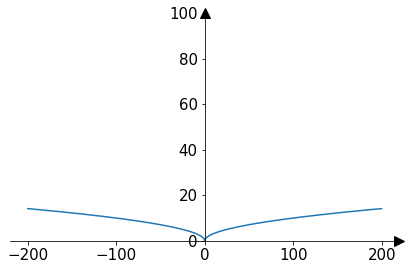

In [301]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-200,200,0.01)
y = np.sqrt(np.abs(x))

rc = {"xtick.direction" : "inout", "ytick.direction" : "inout",
      "xtick.major.size" : 5, "ytick.major.size" : 5,}

plt.rcParams['font.size'] = 15 

# with plt.rc_context(rc):
fig, ax = plt.subplots()
ax.plot(x, y) 

plt.ylim(0,100)

ax.spines['left'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# make arrows
ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
        transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
        transform=ax.get_xaxis_transform(), clip_on=False)

# plt.show()

plt.tight_layout() 

plt.savefig( './figures/toy.png' , dpi = 150)

# in terms of iterations

In [269]:
# res[1] 

plt.rcParams['font.size'] = 15 

def plot_iter(eta , f = True, small = True): 

    for k in [1,10,20,30]: 
        
        if small: 
            res = pickle.load(open('./raw_data/res_k{0}_eta{1}_expsmall'.format(k, eta),'rb')) 
        else: 
            res = pickle.load(open('./raw_data/res_k{0}_eta{1}_explarge'.format(k, eta),'rb')) 
        
        if f: 
            m = np.mean( np.array( res )[:,1,:] , axis = 0 ) 
            std = np.std( np.array( res )[:,1,:] , axis = 0 ) 
            plt.plot( m , label = 'k = {}'.format(k) ) 
            plt.fill_between(range(len(m)), m - std, m + std, alpha = 0.4) 
            
        else: 
            m = np.mean( np.array( res )[:,0,:] , axis = 0 )
            std = np.std( np.array( res )[:,0,:] , axis = 0 ) 
            plt.plot( m , label = 'k = {}'.format(k) ) 
            plt.fill_between(range(len(m)), m - std, m + std, alpha = 0.4) 
            
    if small: 
        res = pickle.load(open('./raw_data/res_gd_eta{}_expsmall'.format(eta),'rb')) 
    else: 
        res = pickle.load(open('./raw_data/res_gd_eta{}_explarge'.format(eta),'rb')) 

    if f: 
        m = np.mean( np.array( res )[:,1,:] , axis = 0 )
        std = np.std( np.array( res )[:,1,:] , axis = 0 )
#             l = 
        plt.plot( m , label = 'GD' ) 
        plt.fill_between(range(len(m)), m - std, m + std, alpha = 0.4)

    else: 
        m = np.mean( np.array( res )[:,0,:] , axis = 0 )
        std = np.std( np.array( res )[:,0,:] , axis = 0 )

        plt.plot( m , label = 'GD' ) 
        plt.fill_between(range(len(m)), m - std, m + std, alpha = 0.4)

    plt.legend() 

    plt.xlabel('Iterations') 
    
    if f: 
        plt.ylabel('$f(x)$') 
        plt.xlim([-50, 3000]) 
        plt.ylim([-10, 50]) 
        
    else: 
        plt.ylabel('$\|\| x \|\|$') 
        plt.xlim([-200, 20000]) 
        plt.ylim([-1, 6.5]) 

    plt.tight_layout() 
    
    if (small and f): 
        plt.savefig( './figures/fig_f_eta{}_expsmall_iter.png'.format(eta) , dpi = 150)
    elif (small and (not f)): 
        plt.savefig( './figures/fig_x_eta{}_expsmall_iter.png'.format(eta) , dpi = 150)
    elif ((not small) and (not f)): 
        plt.savefig( './figures/fig_x_eta{}_explarge_iter.png'.format(eta) , dpi = 150)
    else: 
        plt.savefig( './figures/fig_f_eta{}_explarge_iter.png'.format(eta) , dpi = 150)
        
    plt.clf() 

In [270]:
plot_iter(0.005 , f = True, small = True) 
plot_iter(0.005 , f = False, small = True) 
plot_iter(0.005 , f = True, small = False) 
plot_iter(0.005 , f = False, small = False) 

<Figure size 432x288 with 0 Axes>

In [271]:
# plot_iter_compare(0.001 , f = True, small = True) 
# plot_iter_compare(0.001 , f = False, small = True) 
# plot_iter_compare(0.001 , f = True, small = False) 
# plot_iter_compare(0.001 , f = False, small = False) 

# in terms of sample complexity

In [15]:
plt.rcParams['font.size'] = 15 

def plot_sample(eta , f = True, small = True): 

    for k in [1, 10, 20, 30]:  
        if small: 
            res = pickle.load(open('./raw_data/res_k{0}_eta{1}_expsmall'.format(k, eta),'rb')) 
        else: 
            res = pickle.load(open('./raw_data/res_k{0}_eta{1}_explarge'.format(k, eta),'rb')) 
        
        if f: 
            m = np.mean( np.array( res )[:,1,:] , axis = 0 )
            std = np.std( np.array( res )[:,1,:] , axis = 0 )
            
            plt.plot( np.array(range(len(m))) * k * 2, m , label = 'k = {}'.format(k) ) 
            plt.fill_between( np.array(range(len(m))) * k * 2, m - std, m + std, alpha = 0.4  )
            
        else: 
            m = np.mean( np.array( res )[:,0,:] , axis = 0 )
            std = np.std( np.array( res )[:,0,:] , axis = 0 )
            
            plt.plot( np.array(range(len(m))) * k * 2, m , label = 'k = {}'.format(k) ) 
            plt.fill_between( np.array(range(len(m))) * k * 2, m - std, m + std, alpha = 0.4  )

    plt.legend() 

    plt.xlabel('Number of Function Evaluations') 
    
    if f: 
        plt.ylabel('$f(x)$') 
        plt.xlim([-50, 5000]) 
#         plt.ylim([-10, 50]) 
        
    else: 
        plt.ylabel('$\|\| x \|\|$') 
        plt.xlim([-100, 20000]) 
#         plt.ylim([0, 15]) 

    plt.tight_layout() 
    
#     plt.show()
    
    if (small and f): 
        plt.savefig( './figures/fig_f_eta{}_expsmall_sample.png'.format(eta) , dpi = 150)
    elif (small and (not f)): 
        plt.savefig( './figures/fig_x_eta{}_expsmall_sample.png'.format(eta) , dpi = 150)
    elif ((not small) and (not f)): 
        plt.savefig( './figures/fig_x_eta{}_explarge_sample.png'.format(eta) , dpi = 150)
    else: 
        plt.savefig( './figures/fig_f_eta{}_explarge_sample.png'.format(eta) , dpi = 150)
        
    plt.clf() 

In [16]:
plot_sample(0.005 , f = True, small = True) 
plot_sample(0.005 , f = False, small = True) 
plot_sample(0.005 , f = True, small = False) 
plot_sample(0.005 , f = False, small = False) 

<Figure size 432x288 with 0 Axes>